# 0. Imports

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# 1.1 Loading owid-covid-data

Covid data from our world in data: https://ourworldindata.org/coronavirus-source-data

In [20]:
df_cases = pd.read_csv('../data/owid-covid-data.csv', low_memory=False)
df_cases.head()

iso_code      continent location        date  total_cases  new_cases  \
0      ABW  North America    Aruba  2020-03-13          2.0        2.0   
1      ABW  North America    Aruba  2020-03-19          NaN        NaN   
2      ABW  North America    Aruba  2020-03-20          4.0        2.0   
3      ABW  North America    Aruba  2020-03-21          NaN        NaN   
4      ABW  North America    Aruba  2020-03-22          NaN        NaN   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1               0.286           NaN         NaN                  0.0  ...   
2               0.286           NaN         0.0                  0.0  ...   
3               0.286           NaN         NaN                  0.0  ...   
4               0.286           NaN         NaN                  0.0  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0       35973.781              NaN                    NaN   
1       35973.781              NaN                    NaN   
2       35973.781              NaN                    NaN   
3       35973.781              NaN                    NaN   
4       35973.781              NaN                    NaN   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                11.62             NaN           NaN                     NaN   
1                11.62             NaN           NaN                     NaN   
2                11.62             NaN           NaN                     NaN   
3                11.62             NaN           NaN                     NaN   
4                11.62             NaN           NaN                     NaN   

   hospital_beds_per_thousand  life_expectancy  human_development_index  
0                         NaN            76.29                      NaN  
1                         NaN            76.29                      NaN  
2                         NaN            76.29                      NaN  
3                         NaN            76.29                      NaN  
4                         NaN            76.29                      NaN  

[5 rows x 41 columns]

In [21]:
print(df_cases.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')


# 1.1.1 Date-Dependent Data

The dataset contains both date-dependent country data such as new cases, new deaths etc.:

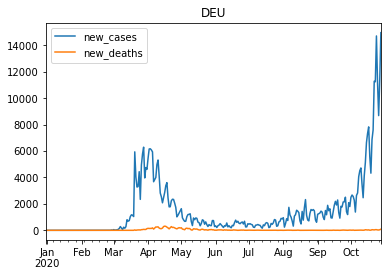

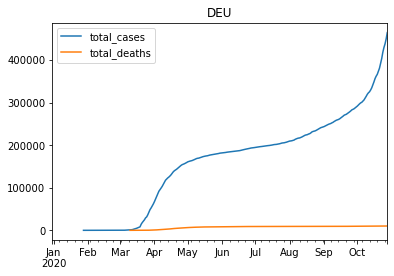

In [33]:
def extract_cases_deaths_by_iso(df, iso):
    """extract list of new cases and new deaths for given iso code"""
    # extract cases and deaths
    df_iso = df.loc[df['iso_code']==iso,['new_cases', 'new_deaths', 'total_cases', 'total_deaths']]
    # set index to datetime
    df_iso = df_iso.set_index(pd.DatetimeIndex(pd.to_datetime(df.loc[df['iso_code']==iso,'date']).values))
    return df_iso

iso_test='DEU'
df_cases_test = extract_cases_deaths_by_iso(df_cases, iso=iso_test)
df_cases_test[['new_cases','new_deaths']].plot(title=iso_test);
df_cases_test[['total_cases','total_deaths']].plot(title=iso_test);

            new_cases_smoothed_per_million
2020-05-02                             NaN
2020-05-03                             NaN
2020-05-04                             NaN
2020-05-05                             NaN
2020-05-06                             NaN
...                                    ...
2020-10-24                           2.464
2020-10-25                           2.464
2020-10-26                           2.464
2020-10-27                           2.464
2020-10-28                           2.136

[180 rows x 1 columns]


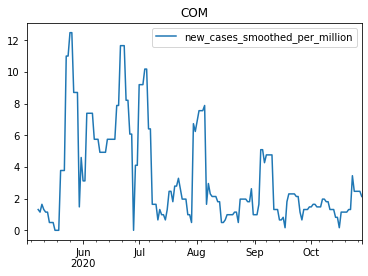

In [223]:
def extract_time_series_by_iso_category(df, iso, category=['new_cases_smoothed_per_million']):
    """extract list of categories for given iso code as time series"""
    # extract categories
    df_iso_category = df.loc[df['iso_code']==iso, category]
    # set index to datetime
    df_iso_category = df_iso_category.set_index(pd.DatetimeIndex(pd.to_datetime(df.loc[df['iso_code']==iso,'date']).values))
    return df_iso_category

df_cases_test = extract_time_series_by_iso_category(df_cases, iso='COM', category=['new_cases_smoothed_per_million'])
print(df_cases_test)
df_cases_test.plot(title='COM');

In [227]:
def extract_value_by_date_iso_category(df, iso, date, category=['new_cases_smoothed_per_million']):
    """extract list of categories for given iso code as time series"""
    # extract categories
    df_iso_category = df.loc[df['iso_code']==iso, category]
    # set index to datetime
    df_iso_category = df_iso_category.set_index(pd.DatetimeIndex(pd.to_datetime(df.loc[df['iso_code']==iso,'date']).values))
    try:
        value = df_iso_category.loc[date,category].values[0]
    except KeyError:
        value=np.nan
    return value

print(extract_value_by_date_iso_category(df_cases, iso='COM', date='2020-04-24', category=['new_cases_per_million']))

nan


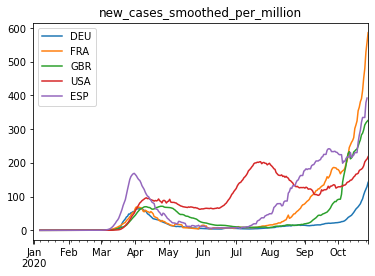

In [23]:
def plot_cases_countries(df, category='new_cases_smoothed_per_million', countries=['DEU','FRA','GBR','USA','ESP']):
    df_category = pd.concat([pd.DataFrame(data=df.loc[df['iso_code']==iso,category].values, columns=[iso])
                             for iso in df['iso_code'].unique()], axis=1)
    df_category = df_category.set_index(pd.DatetimeIndex(pd.to_datetime(df.loc[df['iso_code']=='DEU','date']).values))
    df_category[countries].plot(title=category);

plot_cases_countries(df_cases, category='new_cases_smoothed_per_million', countries=['DEU','FRA','GBR','USA','ESP'])

# 1.1.2 Date-Independent Data

The datset also contains data-independent data such as population etc.:

In [24]:
col=(df_cases[df_cases['iso_code']=='DEU'].mean()).index[df_cases[df_cases['iso_code']=='DEU'].std()<1e-9].values
df_country_c = df_cases.groupby('iso_code').mean()[col]
df_country_c.head()

population  population_density  median_age  aged_65_older  \
iso_code                                                              
ABW         106766.0             584.800        41.2         13.085   
AFG       38928341.0              54.422        18.6          2.581   
AGO       32866268.0              23.890        16.8          2.405   
AIA          15002.0                 NaN         NaN            NaN   
ALB        2877800.0             104.871        38.0         13.188   

          aged_70_older  gdp_per_capita  cardiovasc_death_rate  \
iso_code                                                         
ABW               7.452       35973.781                    NaN   
AFG               1.337        1803.987                597.029   
AGO               1.362        5819.495                276.045   
AIA                 NaN             NaN                    NaN   
ALB               8.643       11803.431                304.195   

          diabetes_prevalence  female_smokers  male_smokers  \
iso_code                                                      
ABW                     11.62             NaN           NaN   
AFG                      9.59             NaN           NaN   
AGO                      3.94             NaN           NaN   
AIA                       NaN             NaN           NaN   
ALB                     10.08             7.1          51.2   

          hospital_beds_per_thousand  life_expectancy  human_development_index  
iso_code                                                                        
ABW                              NaN            76.29                      NaN  
AFG                             0.50            64.83                    0.498  
AGO                              NaN            61.15                    0.581  
AIA                              NaN            81.88                      NaN  
ALB                             2.89            78.57                    0.785

# 1.1.3 Derived Date-Independent Data

We now derive measures derived from the time series data:

In [25]:
# maximum of new cases per million so far
df_country_c['max_new_cases_smoothed_per_million'] = df_cases.groupby('iso_code')['new_cases_smoothed_per_million'].max()
# maximum of new deaths per million so far
df_country_c['max_new_deaths_smoothed_per_million'] = df_cases.groupby('iso_code')['new_deaths_smoothed_per_million'].max()
# total cases so far
df_country_c['total_cases_per_million'] = df_cases.groupby('iso_code')['total_cases_per_million'].max()
# total deaths so far
df_country_c['total_deaths_per_million'] = df_cases.groupby('iso_code')['total_deaths_per_million'].max()

# 1.2 Loading WHO measures data

Loading data:

In [27]:
df_measures = pd.read_excel('../data/WHO_PHSM_Cleaned_V1_20_09_23.xlsx')
df_measures.head()

who_id  dataset           prop_id who_region  \
0         ACAPS_4266    ACAPS              4266       EMRO   
1       OxCGRT_12010   OxCGRT      OXCGRT000304       EMRO   
2  JH_HIT_4942_masks   JH_HIT        4942_masks       EMRO   
3   CDC-ITF-AF-00028  CDC_ITF  CDC-ITF-AF-00028       EMRO   
4       OxCGRT_10765   OxCGRT      OXCGRT000316       EMRO   

  country_territory_area  iso  iso_3166_1_numeric admin_level area_covered  \
0            Afghanistan  AFG                   4    national          NaN   
1            Afghanistan  AFG                   4    national          NaN   
2            Afghanistan  AFG                   4    national          NaN   
3            Afghanistan  AFG                   4    national          NaN   
4            Afghanistan  AFG                   4    national          NaN   

  who_code  ...     enforcement non_compliance_penalty  \
0      2.1  ...     Recommended         Not applicable   
1      1.5  ...  Not applicable              Not known   
2      1.4  ...        Required         Not applicable   
3      5.9  ...       Monitored              Not known   
4      5.9  ...       Monitored         Not applicable   

                                                link link_live link_eng  \
0  https://www.facebook.com/af.moph/posts/1037390...       Yes       No   
1  https://web.archive.org/web/20200621203814/htt...   unknown  unknown   
2  https://www.humanitarianresponse.info/sites/ww...   unknown  unknown   
3  https://www.pajhwok.com/en/2020/03/16/2-key-ro...   unknown  unknown   
4  https://web.archive.org/web/20200605013211/htt...   unknown  unknown   

             source source_type   alt_link alt_link_live alt_link_eng  
0  Afghanistan MoPH  Government  Not Known           NaN          NaN  
1               NaN         NaN        NaN           NaN          NaN  
2               NaN         NaN        NaN           NaN          NaN  
3               NaN         NaN        NaN           NaN          NaN  
4               NaN         NaN        NaN           NaN          NaN  

[5 rows x 31 columns]

In [42]:
print(df_measures.columns)

Index(['who_id', 'dataset', 'prop_id', 'who_region', 'country_territory_area',
       'iso', 'iso_3166_1_numeric', 'admin_level', 'area_covered', 'who_code',
       'who_category', 'who_subcategory', 'who_measure', 'comments',
       'date_start', 'measure_stage', 'prev_measure_number',
       'following_measure_number', 'date_end', 'reason_ended', 'targeted',
       'enforcement', 'non_compliance_penalty', 'link', 'link_live',
       'link_eng', 'source', 'source_type', 'alt_link', 'alt_link_live',
       'alt_link_eng'],
      dtype='object')


Total number of measures per country:

In [28]:
df_country_m = pd.concat( [df_measures.groupby('iso')['who_region'].count().
                           rename('number_of_measures'),
                           df_measures[df_measures['enforcement']=='Required'].
                           groupby('iso')['who_region'].count().rename('number_of_req_measures')], axis=1)

In [29]:
df_country_m.head()

number_of_measures  number_of_req_measures
ABW                  53                    19.0
AFG                 149                    56.0
AGO                 254                    60.0
AIA                  28                     9.0
ALB                 147                    52.0

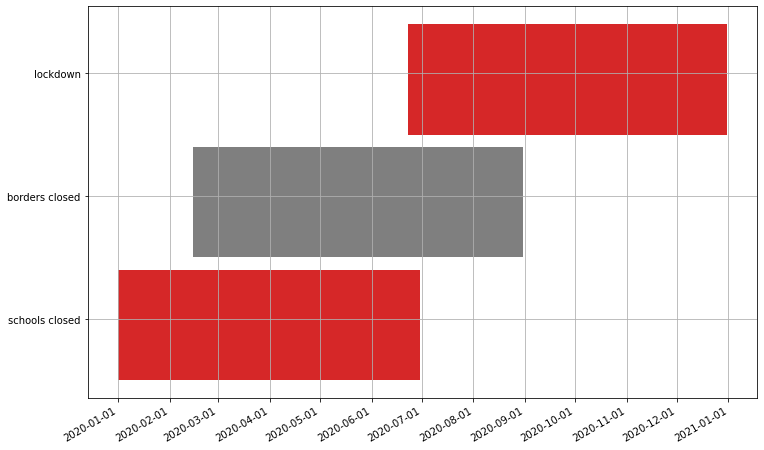

In [30]:
meas_data_plt = pd.DataFrame({'name':['schools closed', 'borders closed', 'lockdown'],
                               'start.date':['2020-01-01', '2020-02-15', '2020-06-23'],
                               'end.date':['2020-06-30', '2020-08-31', '2020-12-31'],
                               'is.critical':[True, False, True]})

def plot_bars(meas_data_plt):
    # Formatters for x-axis labels
    months = mdates.MonthLocator()  # every month
    date_fmt = mdates.DateFormatter('%Y-%m-%d')
    # Create duration column for bars sizes
    meas_data_plt['start.date'] = pd.to_datetime(meas_data_plt['start.date'])
    meas_data_plt['end.date'] = pd.to_datetime(meas_data_plt['end.date'])
    meas_data_plt['duration'] = meas_data_plt['end.date'] - meas_data_plt['start.date']
    # Preperation to have locations of the bars on the y-axis
    meass = {meas : (i+1)*10 for i, meas in enumerate( dict.fromkeys(meas_data_plt['name']) )}
    # Override pandas mandatory conversion to Timestamp
    start_times = [np.datetime64(t, 'D') for t in meas_data_plt['start.date'] ]

    fig, ax_gnt = plt.subplots(figsize = (12, 8))
    # Add bars for each duration
    for i, t in enumerate(meas_data_plt['name']):
        ax_gnt.broken_barh([(start_times[i], meas_data_plt['duration'][i])], (meass[t], 9),
                            facecolors = ('tab:red') if meas_data_plt['is.critical'][i] else ('tab:grey')) 
    ax_gnt.grid(True)
    ax_gnt.set_yticks([i + 5 for i in meass.values()]) 
    ax_gnt.set_yticklabels(dict.fromkeys(meas_data_plt['name']).keys()) 
    # Format the x-axis
    ax_gnt.xaxis_date()
    ax_gnt.xaxis.set_major_locator(months)
    ax_gnt.xaxis.set_major_formatter(date_fmt)
    fig.autofmt_xdate()

plot_bars(meas_data_plt)

# 1.3 Joined Country Data

In [31]:
df_country = df_country_m.join(df_country_c)

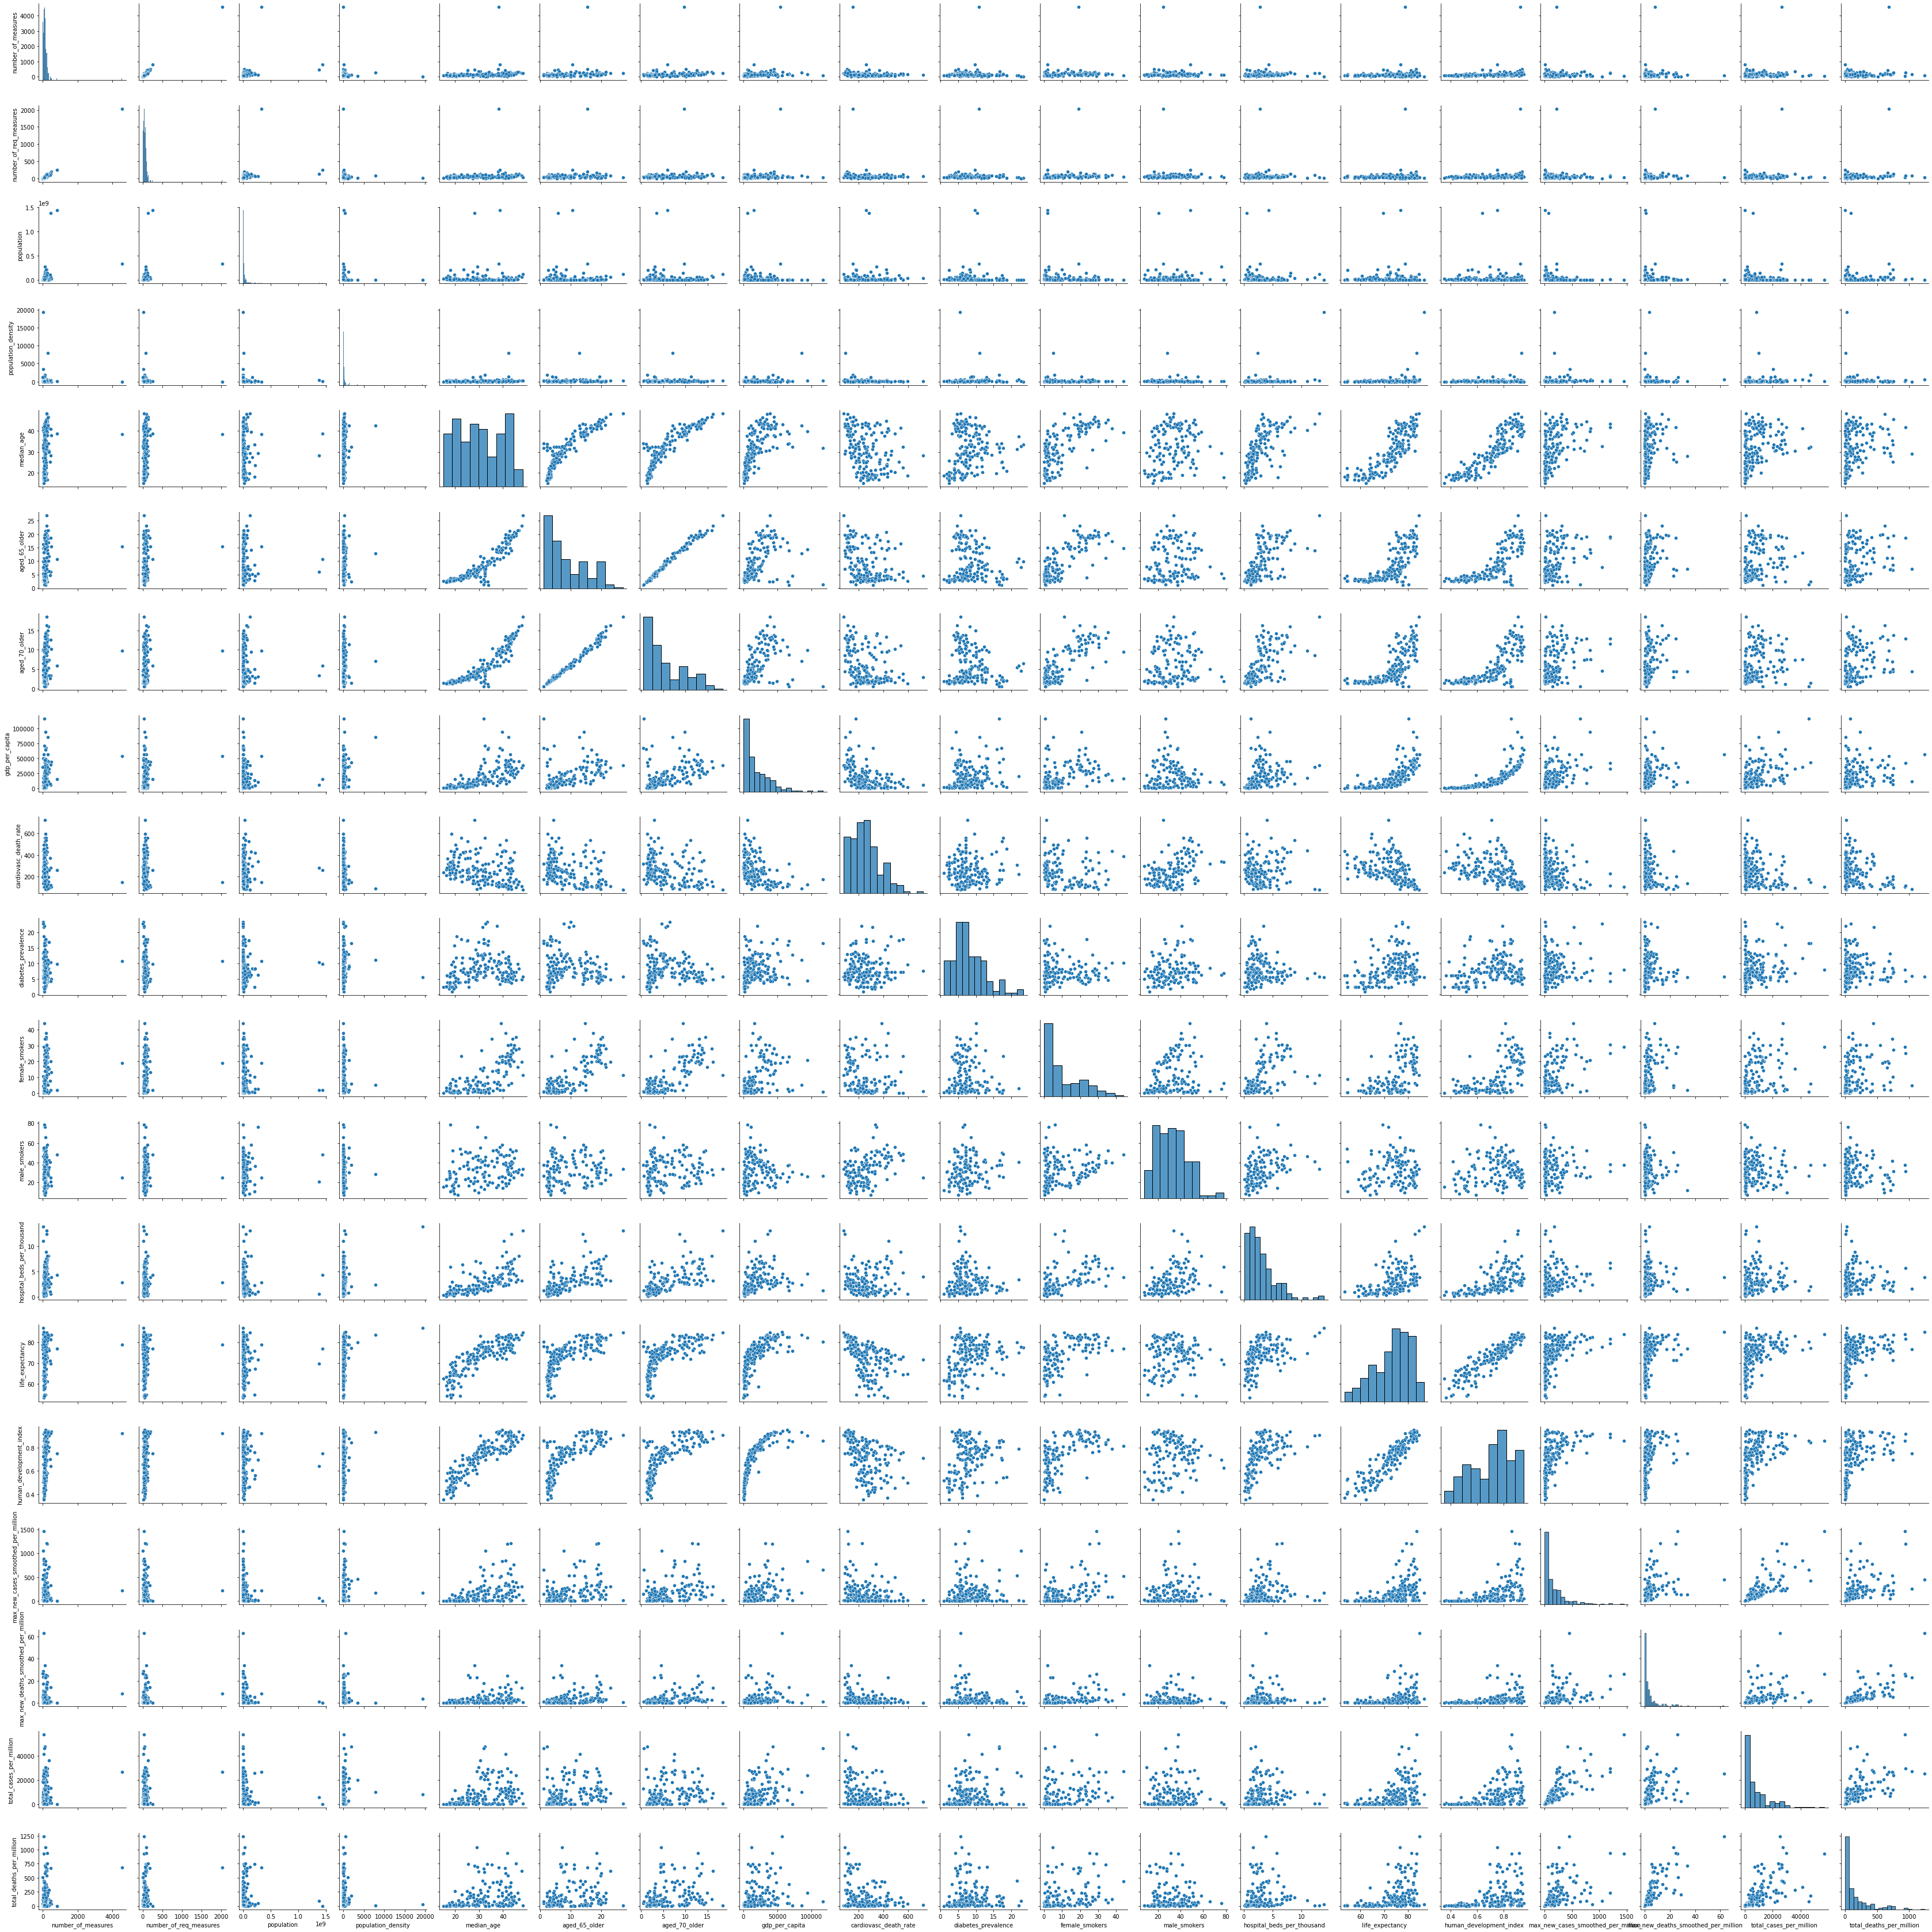

In [32]:
sns.pairplot(df_country)

# 2. Effect of National Stay-at-Home Orders

In [313]:
# extract countries and start dates for national stay at home orders
cond_new_national_stay_at_home = (  (df_measures['who_code']=='4.3.1')
                                  & (df_measures['admin_level']=='national')
                                  & (df_measures['measure_stage']=='new'))
df_stay_at_home = df_measures.loc[cond_new_national_stay_at_home,['iso', 'date_start', 'enforcement']]
df_stay_at_home.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1158 to 27210
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   iso          10 non-null     object        
 1   date_start   10 non-null     datetime64[ns]
 2   enforcement  10 non-null     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 320.0+ bytes


In [325]:
df_measures['who_category'].unique()

array(['Environmental measures', 'Individual measures',
       'International travel measures', 'Other measures',
       'Social and physical distancing measures',
       'Surveillance and response measures', 'Drug-based measures'],
      dtype=object)

In [314]:
df_stay_at_home['enforcement'] = df_stay_at_home['enforcement'].str.lower()

In [315]:
# eliminate countries that are not in df_cases
df_stay_at_home = df_stay_at_home[df_stay_at_home.iso.isin(df_cases.iso_code.unique())]

In [316]:
# extract new cases at start of stay-at-home order
df_stay_at_home['cases_per_million_at_start']=[extract_value_by_date_iso_category(df_cases, iso=iso, date=date, category=['new_cases_smoothed_per_million'])
 for (iso, date) in list(zip(df_stay_at_home['iso'], df_stay_at_home['date_start'].dt.strftime("%Y-%m-%d")))]
df_stay_at_home.head()

iso date_start     enforcement  cases_per_million_at_start
1158  BRN 2020-05-21        required                       0.000
1992  HRV 2020-03-20  not applicable                       2.749
4688  MNE 2020-03-30        required                      14.557
5116  MKD 2020-03-18        required                       1.646
6721  THA 2020-02-17     recommended                       0.004

In [317]:
# extract new cases 7 days after start of stay-at-home order
from datetime import datetime  
from datetime import timedelta
df_stay_at_home['cases_per_million_7d_after_start']=[extract_value_by_date_iso_category(df_cases, iso=iso, date=date, category=['new_cases_smoothed_per_million'])
 for (iso, date) in list(zip(df_stay_at_home['iso'], (df_stay_at_home['date_start']+timedelta(days=7)).dt.strftime("%Y-%m-%d")))]
df_stay_at_home.head()

iso date_start     enforcement  cases_per_million_at_start  \
1158  BRN 2020-05-21        required                       0.000   
1992  HRV 2020-03-20  not applicable                       2.749   
4688  MNE 2020-03-30        required                      14.557   
5116  MKD 2020-03-18        required                       1.646   
6721  THA 2020-02-17     recommended                       0.004   

      cases_per_million_7d_after_start  
1158                             0.000  
1992                            13.606  
4688                            29.342  
5116                             8.023  
6721                             0.002

In [318]:
# extract new cases 14 days after start of stay-at-home order
from datetime import datetime  
from datetime import timedelta
df_stay_at_home['cases_per_million_14d_after_start']=[extract_value_by_date_iso_category(df_cases, iso=iso, date=date, category=['new_cases_smoothed_per_million'])
 for (iso, date) in list(zip(df_stay_at_home['iso'], (df_stay_at_home['date_start']+timedelta(days=14)).dt.strftime("%Y-%m-%d")))]
df_stay_at_home.head()

iso date_start     enforcement  cases_per_million_at_start  \
1158  BRN 2020-05-21        required                       0.000   
1992  HRV 2020-03-20  not applicable                       2.749   
4688  MNE 2020-03-30        required                      14.557   
5116  MKD 2020-03-18        required                       1.646   
6721  THA 2020-02-17     recommended                       0.004   

      cases_per_million_7d_after_start  cases_per_million_14d_after_start  
1158                             0.000                              0.000  
1992                            13.606                             17.956  
4688                            29.342                             13.193  
5116                             8.023                             12.411  
6721                             0.002                              0.016

In [319]:
# delete nan rows
df_stay_at_home = df_stay_at_home.dropna(axis=0)
df_stay_at_home.head()

iso date_start     enforcement  cases_per_million_at_start  \
1158  BRN 2020-05-21        required                       0.000   
1992  HRV 2020-03-20  not applicable                       2.749   
4688  MNE 2020-03-30        required                      14.557   
5116  MKD 2020-03-18        required                       1.646   
6721  THA 2020-02-17     recommended                       0.004   

      cases_per_million_7d_after_start  cases_per_million_14d_after_start  
1158                             0.000                              0.000  
1992                            13.606                             17.956  
4688                            29.342                             13.193  
5116                             8.023                             12.411  
6721                             0.002                              0.016

<AxesSubplot:xlabel='cases_per_million_at_start', ylabel='cases_per_million_14d_after_start'>

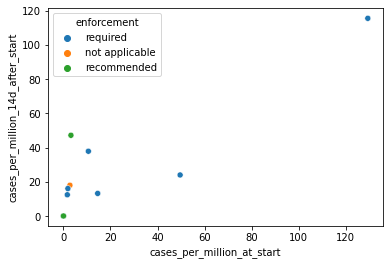

In [320]:
sns.scatterplot(x='cases_per_million_at_start',
                y='cases_per_million_14d_after_start',
                data=df_stay_at_home,
                hue='enforcement')

In [278]:
# reindex and join with country data
df_stay_at_home = df_stay_at_home.set_index('iso')
df_stay_at_home = df_stay_at_home.join(df_country)

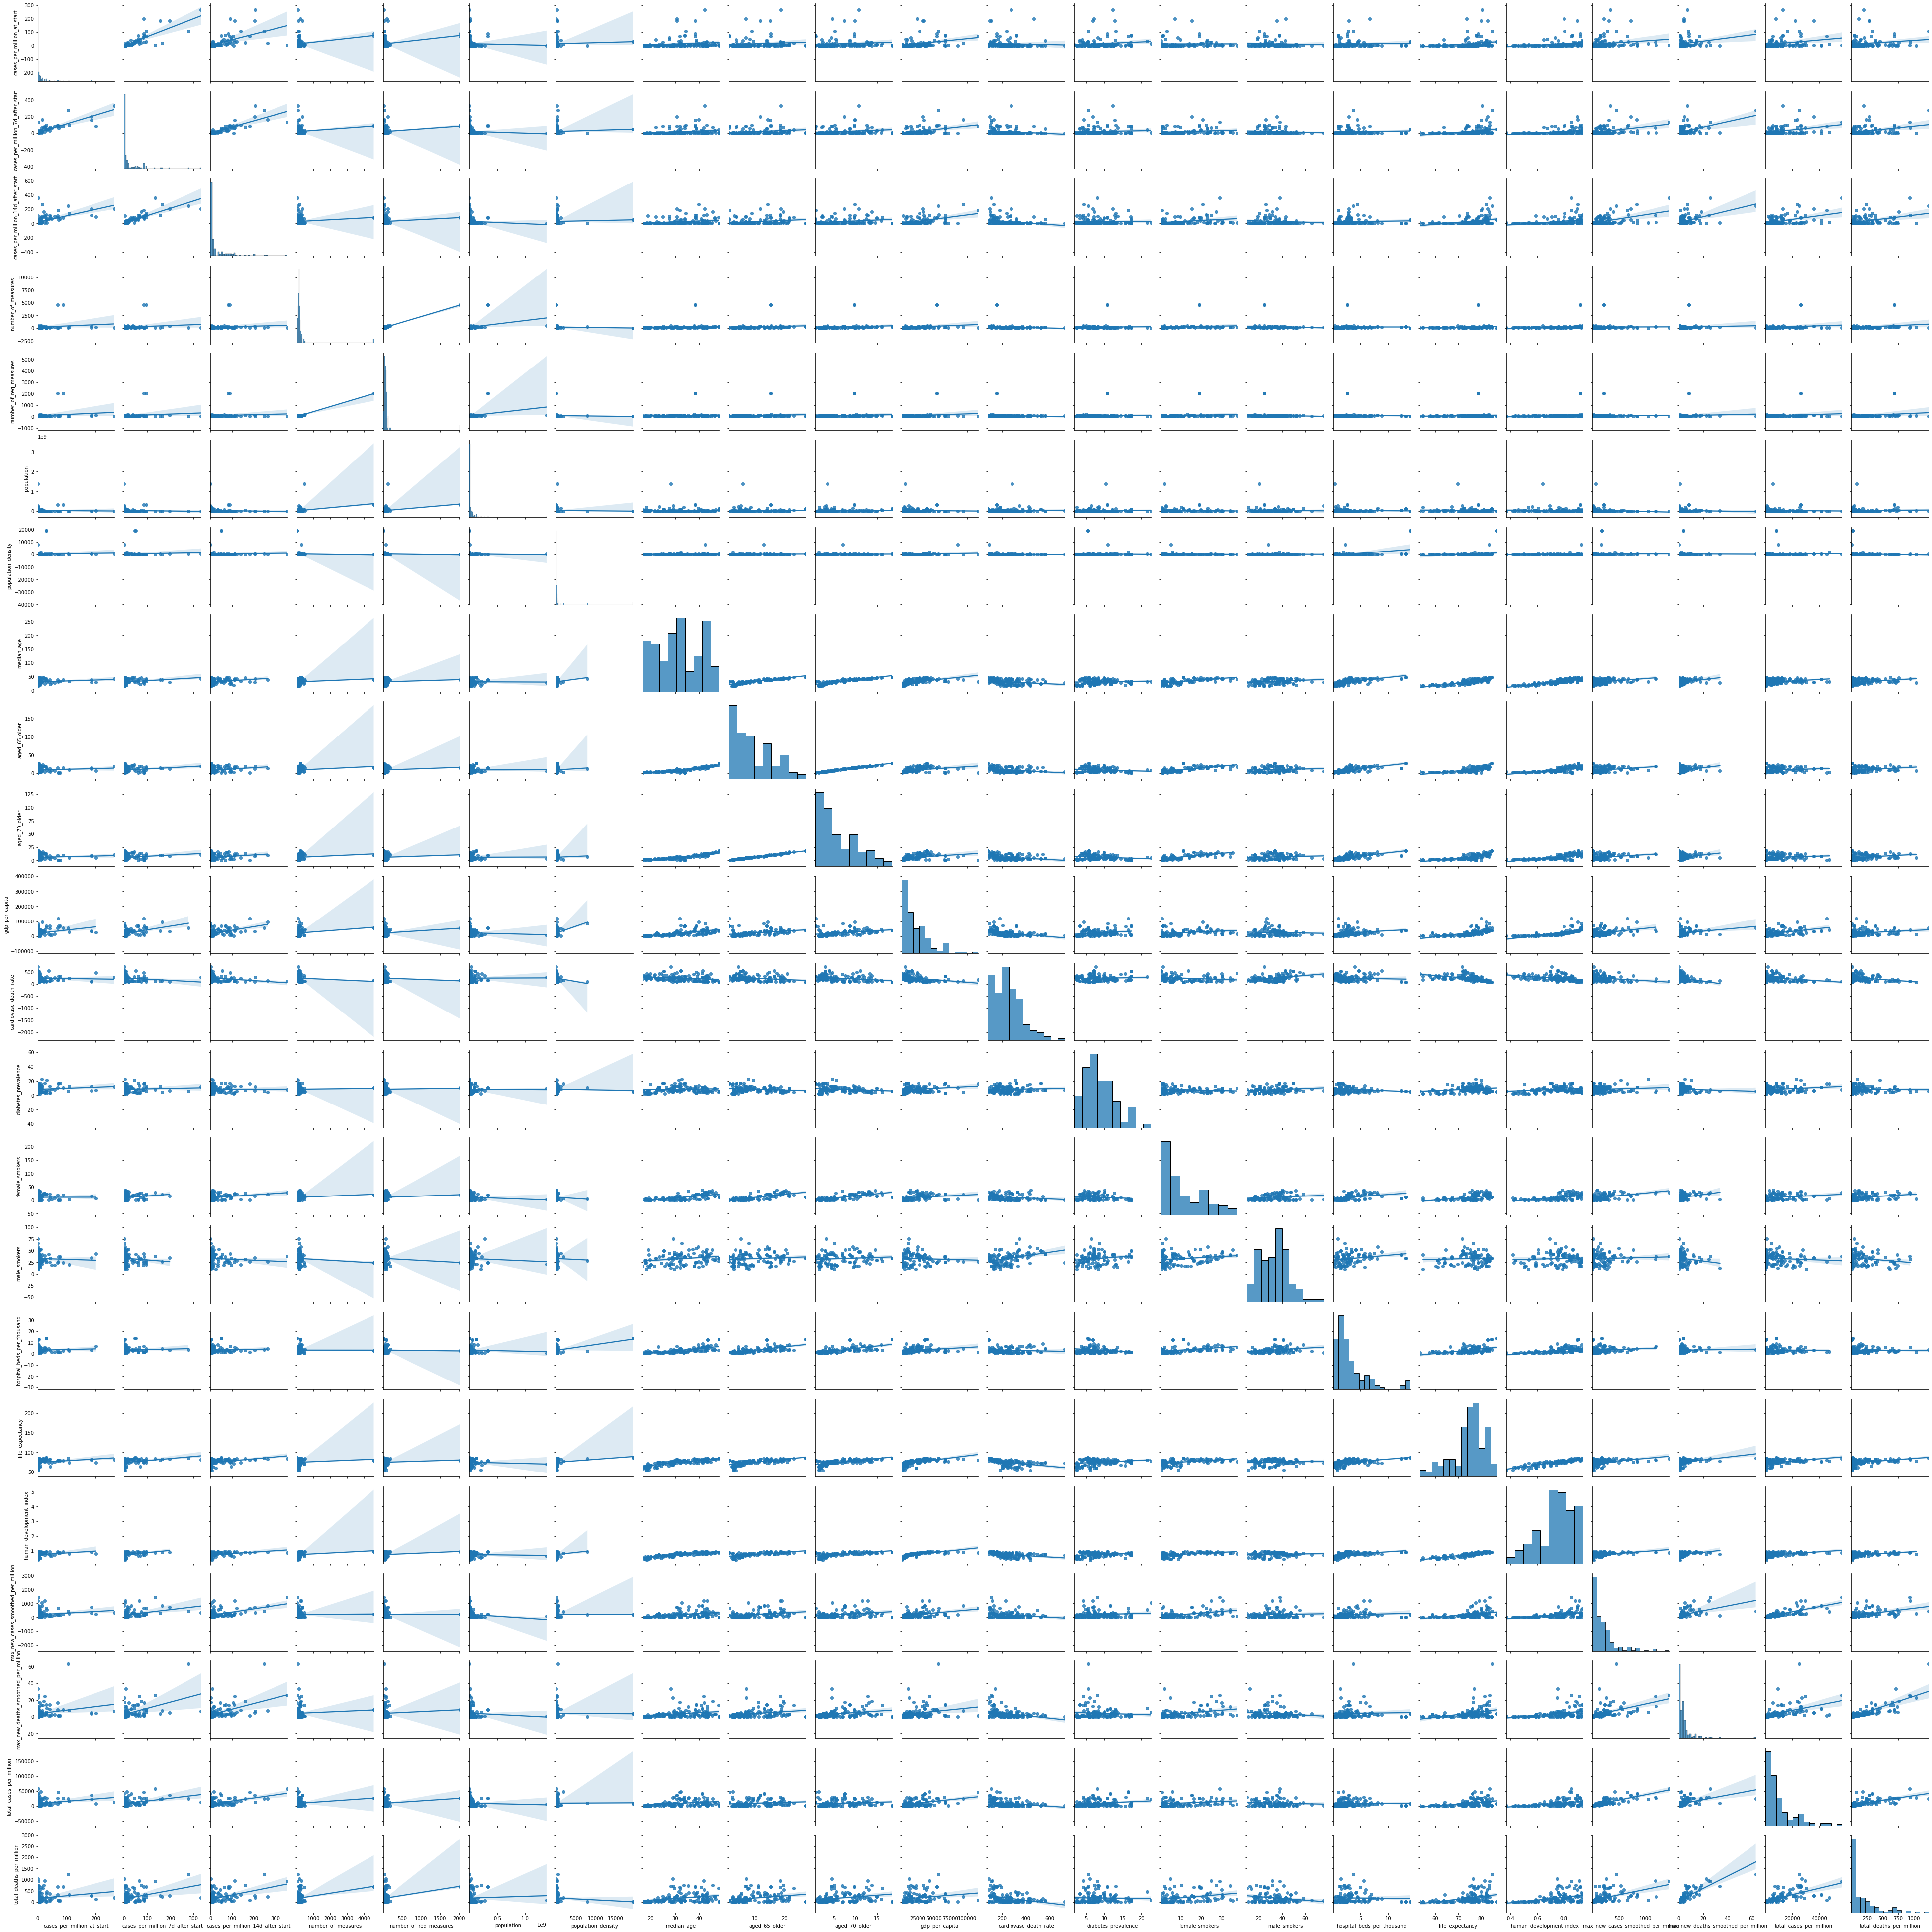

In [280]:
sns.pairplot(df_stay_at_home, kind="reg")